# Thercy - Rankine Examples

In [1]:
import CoolProp.CoolProp as CP
import numpy as np
import warnings

from CoolProp.Plots import PropertyPlot
from thercy.cycles import CycleBuilder

warnings.filterwarnings('ignore')

![Shapiro - Example 8.1](../assets/shapiro-8_1.png)

State   Temperature (K)     Pressure (Pa)   Density (kg/m3)   Enthalpy (J/kg)  Entropy (J/kg/K)       Quality (-)  Fraction (kg/m3)
    0           568.158       8000000.000            42.507       2758683.198          5744.991             1.000          1000.000
    1           314.659          8000.000             0.082       1795118.884          5744.991             0.675          1000.000
    2           314.659          8000.000           991.590        173839.800           592.491             0.000          1000.000
    3           314.901       8000000.000           994.967        181885.847           592.491            -1.000          1000.000

Efficiency: 37.1%


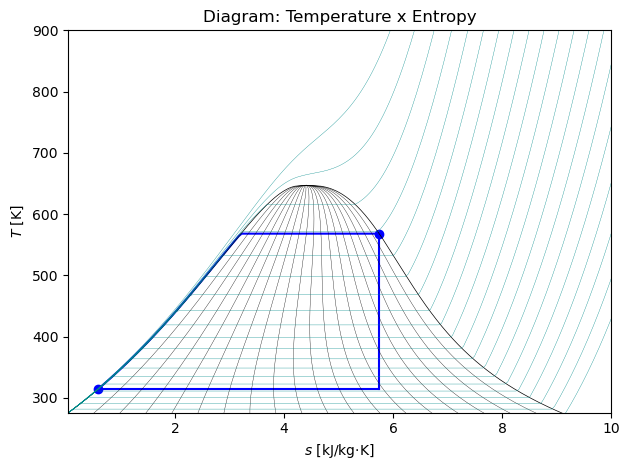

In [2]:
builder = (CycleBuilder('Water')
.add_turbine(
    'turbine',
    'steam generator',
    'condenser',
    8.0e3)
.add_condenser(
    'condenser',
    'turbine',
    'pump')
.add_pump(
    'pump',
    'condenser',
    'steam generator',
    8.0e6)
.add_steam_generator(
    'steam generator',
    'pump',
    'turbine',
    'Q',
    1.0)
)

cycle = builder.build()
x0 = np.array(4 * [[1.0e6, 500.0]])
sol = cycle.solve(x0, ['P', 'T'])

print(sol.x)
print(f"Efficiency: {cycle.efficiency * 100.0:.1f}%")

pp = PropertyPlot('Water', 'TS', unit_system='kSI')
pp.calc_isolines(CP.iQ, num=20)
pp.calc_isolines(CP.iP, num=20)

for state in [cloud.to_state_container() for cloud in cycle.graph.cloud_points(100, False)]:
    pp.draw_process(state, line_opts={'color': 'blue', 'lw': 1.5})

pp.title(r'Diagram: Temperature x Entropy')
pp.xlabel(r'$s$ [kJ/kg·K]')
pp.ylabel(r'$T$ [K]')
pp.set_axis_limits([None, 10, None, 900])
pp.show()

# State indexes
# Index:  0, State:  1
# Index:  1, State:  2
# Index:  2, State:  3
# Index:  3, State:  4

    ![Shapiro - Example 8.4](../assets/shapiro-8_4.png)

State   Temperature (K)     Pressure (Pa)   Density (kg/m3)   Enthalpy (J/kg)  Entropy (J/kg/K)       Quality (-)  Fraction (kg/m3)
    0           753.150       8000000.000            24.776       3349645.166          6661.264            -1.000          1000.000
    1           468.041        700000.000             3.377       2833731.528          6863.876            -1.000          1000.000
    2           713.150        700000.000             2.142       3353892.229          7758.981            -1.000          1000.000
    3           314.659          8000.000             0.055       2567596.653          8199.960             0.996          1000.000
    4           314.659          8000.000           991.590        173839.800           592.491             0.000          1000.000
    5           314.901       8000000.000           994.967        181885.847           592.491            -1.000          1000.000

Efficiency: 35.1%


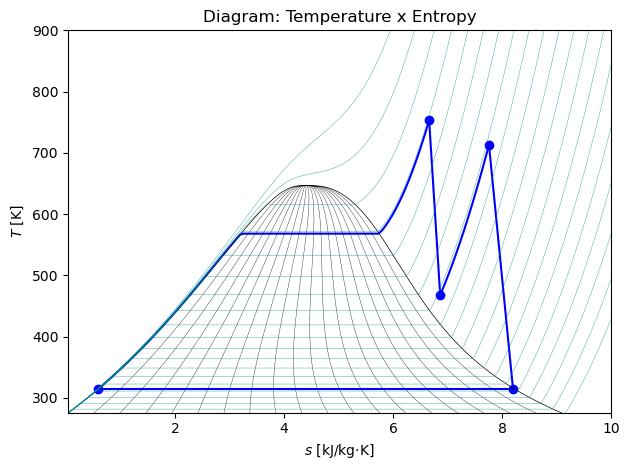

In [3]:
builder = (CycleBuilder('Water')
.add_turbine(
    'turbine (1st stage)',
    'steam generator (1st stage)',
    'steam generator (2nd stage)',
    0.7e6,
    eta=0.85)
.add_steam_generator(
    'steam generator (2nd stage)',
    'turbine (1st stage)',
    'turbine (2nd stage)',
    'T',
    440.0 + 273.15)
.add_turbine(
    'turbine (2nd stage)',
    'steam generator (2nd stage)',
    'condenser',
    8.0e3,
    eta=0.85)
.add_condenser(
    'condenser',
    'turbine (2nd stage)',
    'pump')
.add_pump(
    'pump',
    'condenser',
    'steam generator (1st stage)',
    8.0e6)
.add_steam_generator(
    'steam generator (1st stage)',
    'pump',
    'turbine (1st stage)',
    'T',
    480.0 + 273.15)
)

cycle = builder.build()
x0 = np.array(6 * [[1.0e6, 500.0]])
sol = cycle.solve(x0, ['P', 'T'])

print(sol.x)
print(f"Efficiency: {cycle.efficiency * 100.0:.1f}%")

pp = PropertyPlot('Water', 'TS', unit_system='kSI')
pp.calc_isolines(CP.iQ, num=20)
pp.calc_isolines(CP.iP, num=20)

for state in [cloud.to_state_container() for cloud in cycle.graph.cloud_points(100, False)]:
    pp.draw_process(state, line_opts={'color': 'blue', 'lw': 1.5})

pp.title(r'Diagram: Temperature x Entropy')
pp.xlabel(r'$s$ [kJ/kg·K]')
pp.ylabel(r'$T$ [K]')
pp.set_axis_limits([None, 10, None, 900])
pp.show()

# State indexes
# Index:  0, State:  1
# Index:  1, State:  2
# Index:  2, State:  3
# Index:  3, State:  4
# Index:  4, State:  5
# Index:  5, State:  6

![Shapiro - Example 8.6](../assets/shapiro-8_6.png)

State   Temperature (K)     Pressure (Pa)   Density (kg/m3)   Enthalpy (J/kg)  Entropy (J/kg/K)       Quality (-)  Fraction (kg/m3)
    0           753.150       8000000.000            24.776       3349645.166          6661.264            -1.000          1000.000
    1           547.731       2000000.000             8.436       2964148.589          6661.264            -1.000           149.648
    2           547.731       2000000.000             8.436       2964148.589          6661.264            -1.000           850.352
    3           438.096        700000.000             3.702       2742687.975          6661.264             0.990           850.352
    4           713.150        700000.000             2.142       3353892.229          7758.981            -1.000           850.352
    5           588.879        300000.000             1.111       3101693.923          7758.981            -1.000            94.753
    6           588.879        300000.000             1.111       3101693.92

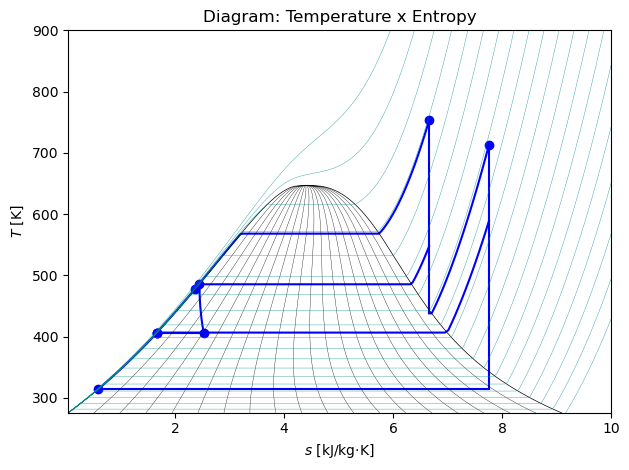

In [4]:
builder = (CycleBuilder('Water')
.add_turbine(
    'turbine 1 (1st stage)',
    'steam generator (1st stage)',
    ['closed heater', 'turbine 2 (1st stage)'],
    2.0e6,
    eta=1.0)
.add_turbine(
    'turbine 2 (1st stage)',
    'turbine 1 (1st stage)',
    'steam (2nd stage)',
    0.7e6,
    eta=1.0)
.add_steam_generator(
    'steam (2nd stage)',
    'turbine 2 (1st stage)',
    'turbine 1 (2nd stage)',
    'T',
    440.0 + 273.15)
.add_turbine(
    'turbine 1 (2nd stage)',
    'steam (2nd stage)',
    ['open heater', 'turbine 2 (2nd stage)'],
    0.3e6,
    eta=1.0)
.add_turbine(
    'turbine 2 (2nd stage)',
    'turbine 1 (2nd stage)',
    'condenser',
    8.0e3,
    eta=1.0)
.add_condenser(
    'condenser',
    'turbine 2 (2nd stage)',
    'pump (low pressure)')
.add_pump(
    'pump (low pressure)',
    'condenser',
    'open heater',
    0.3e6,
    eta=1.0)
.add_heater_open(
    'open heater',
    ['turbine 1 (2nd stage)', 'pump (low pressure)', 'trap'],
    'pump (high pressure)')
.add_pump(
    'pump (high pressure)',
    'open heater',
    'closed heater',
    8.0e6,
    eta=1.0)
.add_heater_closed(
    'closed heater',
    ['turbine 1 (1st stage)'],
    'pump (high pressure)',
    'trap',
    'steam generator (1st stage)',
    205.0 + 273.15)
.add_trap(
    'trap',
    'closed heater',
    'open heater',
    0.3e6)
.add_steam_generator(
    'steam generator (1st stage)',
    'closed heater',
    'turbine 1 (1st stage)',
    'T',
    480.0 + 273.15)
)

cycle = builder.build()
x0 = np.array(15 * [[1.0e6, 500.0]])
sol = cycle.solve(x0, ['P', 'T'])

print(sol.x)
print(f"Efficiency: {cycle.efficiency * 100.0:.1f}%")

pp = PropertyPlot('Water', 'TS', unit_system='kSI')
pp.calc_isolines(CP.iQ, num=20)
pp.calc_isolines(CP.iP, num=20)

for state in [cloud.to_state_container() for cloud in cycle.graph.cloud_points(100, False)]:
    pp.draw_process(state, line_opts={'color': 'blue', 'lw': 1.5})

pp.title(r'Diagram: Temperature x Entropy')
pp.xlabel(r'$s$ [kJ/kg·K]')
pp.ylabel(r'$T$ [K]')
pp.set_axis_limits([None, 10, None, 900])
pp.show()

# State indexes
# Index:  0, State:  1
# Index:  1, State:  2
# Index:  2, State:  2
# Index:  3, State:  3
# Index:  4, State:  4
# Index:  5, State:  5
# Index:  6, State:  5
# Index:  7, State:  6
# Index:  8, State:  7
# Index:  9, State:  8
# Index: 10, State: 13
# Index: 11, State:  9
# Index: 12, State: 10
# Index: 13, State: 12
# Index: 14, State: 11